# Module 1 Recap of Keras Basics

## Feedforward NN

In [1]:
import keras
from keras.datasets import mnist

# Step 1:Load the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test,10)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [2]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64,input_dim=784,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 4s 74us/step - loss: 0.2784 - acc: 0.9201 - val_loss: 0.1560 - val_acc: 0.9552
Epoch 2/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1258 - acc: 0.9618 - val_loss: 0.1050 - val_acc: 0.9667
Epoch 3/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0920 - acc: 0.9716 - val_loss: 0.1005 - val_acc: 0.9689
Epoch 4/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0719 - acc: 0.9776 - val_loss: 0.0948 - val_acc: 0.9721
Epoch 5/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0594 - acc: 0.9812 - val_loss: 0.0889 - val_acc: 0.9747
Epoch 6/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0473 - acc: 0.9851 - val_loss: 0.0872 - val_acc: 0.9738
Epoch 7/10
60000/6000

In [3]:
loss,accuracy = model.evaluate(X_test,y_test)
print("Accuracy ",accuracy)

10000/10000 [==============================] - 0s 24us/step
Accuracy  0.9757


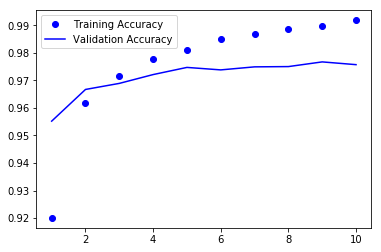

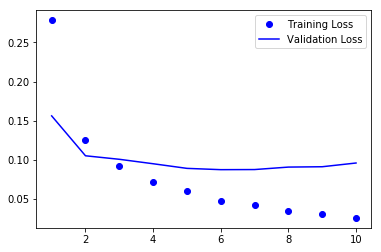

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'bo',label='Training Accuracy')
plt.plot(epochs, val_acc,'b',label='Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo',label='Training Loss')
plt.plot(epochs, val_loss,'b',label='Validation Loss')
plt.legend()

plt.show()

## CNN

In [0]:
import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu',padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.1144 - acc: 0.9652 - val_loss: 0.0412 - val_acc: 0.9865
Epoch 2/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0393 - acc: 0.9881 - val_loss: 0.0346 - val_acc: 0.9885
Epoch 3/10
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0248 - acc: 0.9921 - val_loss: 0.0283 - val_acc: 0.9911
Epoch 4/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0196 - acc: 0.9935 - val_loss: 0.0300 - val_acc: 0.9900
Epoch 5/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0131 - acc: 0.9957 - val_loss: 0.0267 - val_acc: 0.9912
Epoch 6/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0107 - acc: 0.9968 - val_loss: 0.0255 - val_acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0090 - acc: 0.9971 - val_loss: 0.0302 -

In [8]:
loss,accuracy = model.evaluate(X_test,y_test)
print("Accuracy ",accuracy)

10000/10000 [==============================] - 4s 441us/step
Accuracy  0.9899


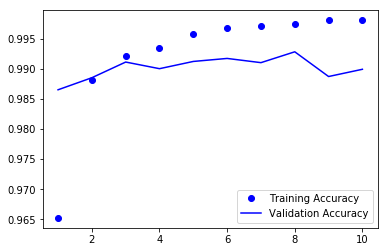

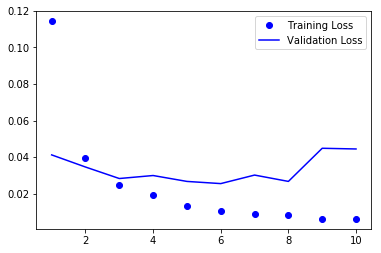

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'bo',label='Training Accuracy')
plt.plot(epochs, val_acc,'b',label='Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo',label='Training Loss')
plt.plot(epochs, val_loss,'b',label='Validation Loss')
plt.legend()

plt.show()

## RNN

In [10]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000

# Cut texts after this number of words 
maxlen = 20

# Load the data as lists of integers.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

17465344/17464789 [==============================] - 1s 0us/step


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

model = Sequential()
model.add(Embedding(max_features, 50))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

#model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 21s 836us/step - loss: 0.5340 - acc: 0.7235 - val_loss: 0.4867 - val_acc: 0.7613
Epoch 2/10
25000/25000 [==============================] - 19s 772us/step - loss: 0.4340 - acc: 0.7941 - val_loss: 0.4635 - val_acc: 0.7731
Epoch 3/10
25000/25000 [==============================] - 19s 779us/step - loss: 0.4048 - acc: 0.8115 - val_loss: 0.4983 - val_acc: 0.7657
Epoch 4/10
25000/25000 [==============================] - 19s 772us/step - loss: 0.3811 - acc: 0.8258 - val_loss: 0.4914 - val_acc: 0.7640
Epoch 5/10
25000/25000 [==============================] - 19s 767us/step - loss: 0.3588 - acc: 0.8377 - val_loss: 0.4890 - val_acc: 0.7716
Epoch 6/10
25000/25000 [==============================] - 19s 773us/step - loss: 0.3362 - acc: 0.8543 - val_loss: 0.5285 - val_acc: 0.7671
Epoch 7/10
25000/25000 [==============================] - 19s 762us/step - loss: 0.3134 - acc: 0.8649 - val_loss: 0.

In [0]:
loss,accuracy = model.evaluate(X_test,y_test)
print("Accuracy ",accuracy)

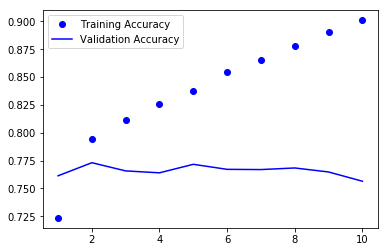

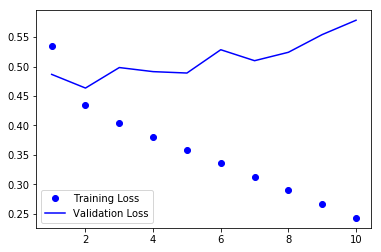

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'bo',label='Training Accuracy')
plt.plot(epochs, val_acc,'b',label='Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo',label='Training Loss')
plt.plot(epochs, val_loss,'b',label='Validation Loss')
plt.legend()

plt.show()